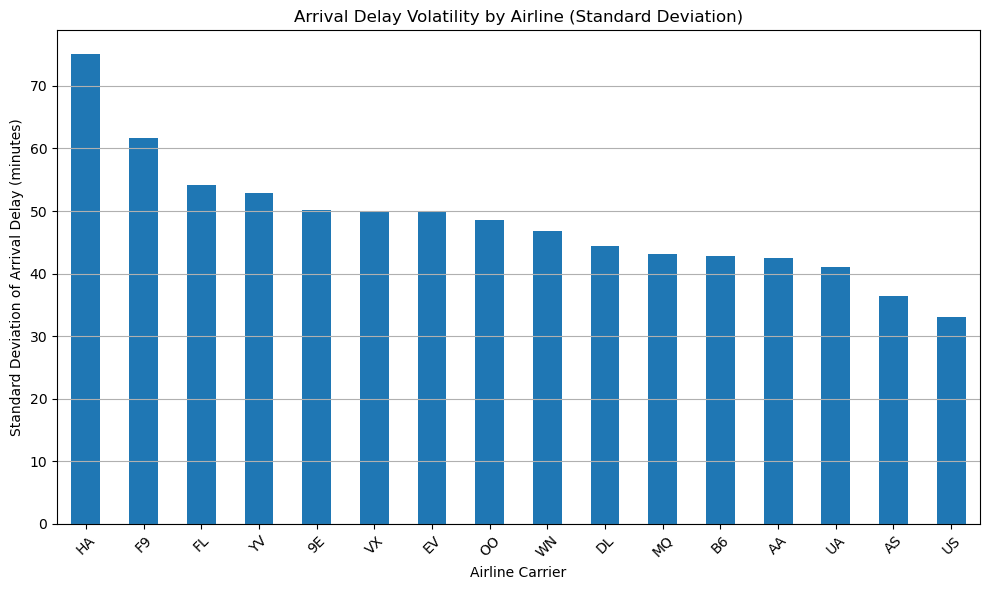

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("flights.csv")
delay_data = df[['carrier', 'arr_delay']].dropna()
volatility = delay_data.groupby('carrier')['arr_delay'].std().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
volatility.plot(kind='bar')
plt.title('Arrival Delay Volatility by Airline (Standard Deviation)')
plt.ylabel('Standard Deviation of Arrival Delay (minutes)')
plt.xlabel('Airline Carrier')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This chart compares the arrival delay volatility across U.S. airline carriers, measured by the standard deviation of arrival delays. Airlines with higher bars exhibit greater inconsistency in on-time performance, indicating higher operational risk. Hawaiian Airlines (HA) shows the highest volatility, while US Airways (US) appears the most stable.

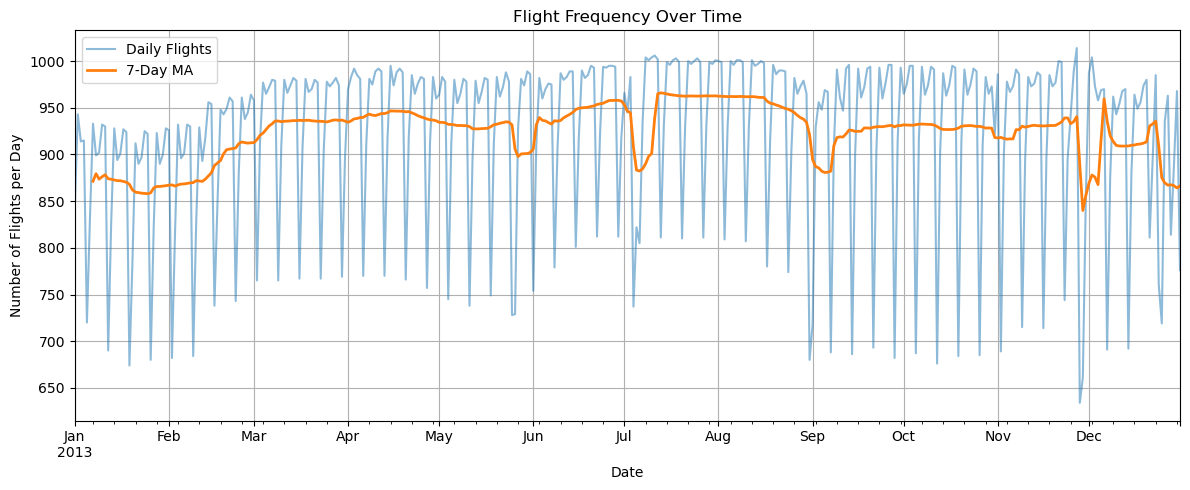

In [3]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
daily_flights = df.set_index('time_hour').resample('D').size()

plt.figure(figsize=(12, 5))
daily_flights.plot(label='Daily Flights', alpha=0.5)
daily_flights.rolling(window=7).mean().plot(label='7-Day MA', linewidth=2)
plt.title('Flight Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights per Day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We observed a clear weekly seasonality in daily flight frequencies, indicating structured operational cycles.
The 7-day moving average shows a gradual increase from March to July, suggesting increased market demand during the summer season.
Significant drops in flight activity were detected in September and late December, which may correspond to operational adjustments or holiday-related disruptions.

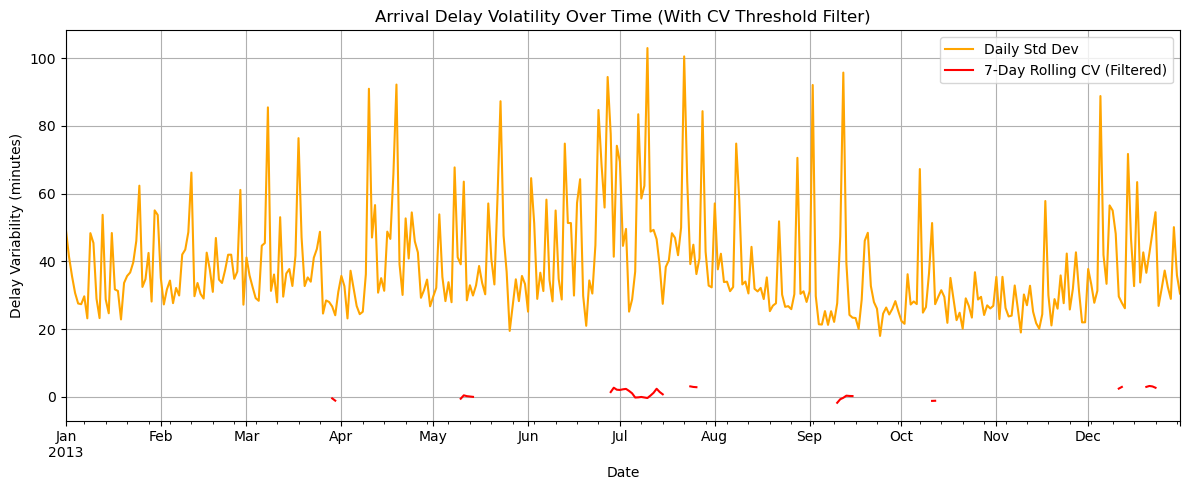

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("flights.csv")
df['time_hour'] = pd.to_datetime(df['time_hour'])
daily_stats = df.set_index('time_hour').resample('D')['arr_delay'].agg(['mean', 'std']).dropna()
threshold = 5
safe_mean = daily_stats['mean'].where(daily_stats['mean'].abs() > threshold, pd.NA)
daily_stats['cv'] = daily_stats['std'] / safe_mean

plt.figure(figsize=(12, 5))
daily_stats['std'].plot(label='Daily Std Dev', color='orange')
daily_stats['cv'].rolling(7).mean().plot(label='7-Day Rolling CV (Filtered)', color='red')
plt.title('Arrival Delay Volatility Over Time (With CV Threshold Filter)')
plt.ylabel('Delay Variability (minutes)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

To avoid distortion caused by near-zero mean delays, we filtered CV calculation by applying a ±5-minute threshold.
This approach significantly improved the interpretability of relative volatility trends.
Resulting CV values now highlight only genuinely unstable periods, enhancing the signal quality of volatility-based risk metrics.